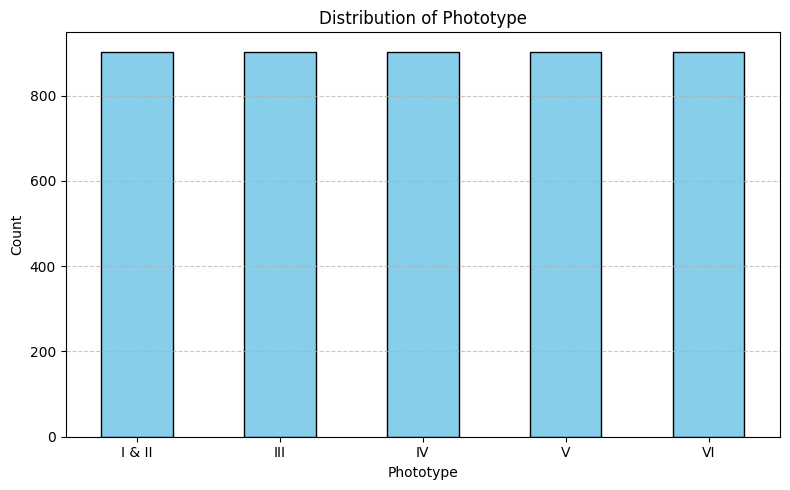

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv('archive/fitz_undersampled_test_final.csv')  # Replace with your actual file name

# Count occurrences of each phototype
phototype_counts = df['phototype'].value_counts().sort_index()

# Plot
plt.figure(figsize=(8, 5))
phototype_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Phototype')
plt.xlabel('Phototype')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [2]:
df['phototype'].value_counts()

phototype
III       903
IV        903
V         903
VI        903
I & II    903
Name: count, dtype: int64

Filtered test data distribution

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv('val-data.csv')  # Replace with your actual file name

df['label'].value_counts()

label
Type VI        303
Type IV        127
Type V         119
Type III        85
Type I & II     36
Name: count, dtype: int64

Evaluate classification result

Accuracy: 0.8328

Classification Report:
              precision    recall  f1-score   support

 Type I & II       0.90      1.00      0.95        36
    Type III       0.97      0.85      0.91        85
     Type IV       0.85      0.69      0.76       127
      Type V       0.60      0.55      0.57       119
     Type VI       0.86      0.98      0.92       303

    accuracy                           0.83       670
   macro avg       0.84      0.81      0.82       670
weighted avg       0.83      0.83      0.83       670

Confusion Matrix:


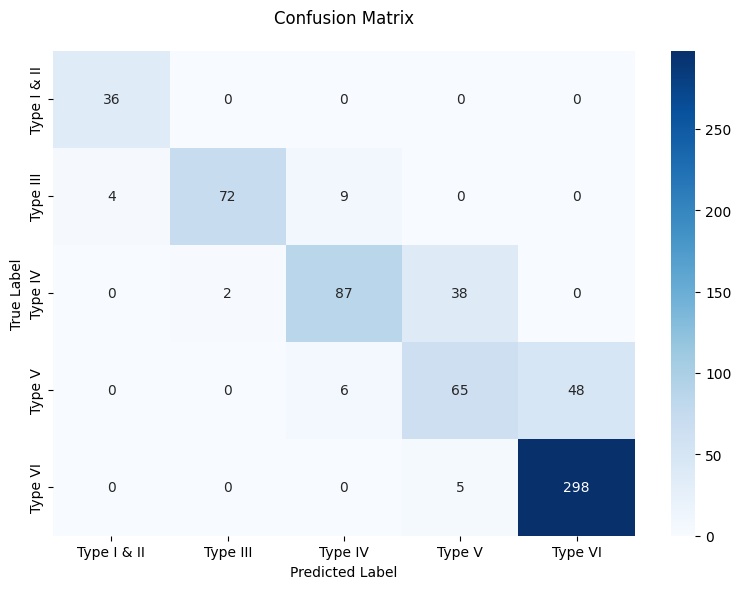

Evaluation Metrics (%):

Accuracy             : 83.28%
Macro F1 Score       : 82.08%
Weighted F1 Score    : 82.69%


In [14]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV
df = pd.read_csv("result-val/gpt-4-1/gpt-4-1-rpfs-test.csv")

# Merge 'Type I' and 'Type II' in predicted_label into 'Type I & II'
df['predicted_label'] = df['predicted_label'].replace({'Type I': 'Type I & II', 'Type II': 'Type I & II'})

# y_true remains unchanged
y_true = df['label']
y_pred = df['predicted_label']

# Define label order for consistent matrix axes
labels = sorted(list(set(y_true) | set(y_pred)))

# Evaluation
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.4f}\n")
print("Classification Report:")
print(classification_report(y_true, y_pred, labels=labels))
print("Confusion Matrix:")

# Confusion matrix and visualization
cm = confusion_matrix(y_true, y_pred, labels=labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix", pad=20)
plt.tight_layout()
plt.show()

# Percentage Result

# Get classification report as dictionary
report = classification_report(y_true, y_pred, labels=labels, output_dict=True)

# Extract metrics in percentage
precision_macro = report['macro avg']['precision'] * 100
recall_macro = report['macro avg']['recall'] * 100
f1_macro = report['macro avg']['f1-score'] * 100

precision_weighted = report['weighted avg']['precision'] * 100
recall_weighted = report['weighted avg']['recall'] * 100
f1_weighted = report['weighted avg']['f1-score'] * 100

accuracy = accuracy_score(y_true, y_pred) * 100

# Print report
print("Evaluation Metrics (%):\n")
print(f"Accuracy             : {accuracy:.2f}%")
# print(f"Macro Precision    : {precision_macro:.2f}%")
# print(f"Macro Recall       : {recall_macro:.2f}%")
print(f"Macro F1 Score       : {f1_macro:.2f}%")
# print(f"Weighted Precision : {precision_weighted:.2f}%")
# print(f"Weighted Recall    : {recall_weighted:.2f}%")
print(f"Weighted F1 Score    : {f1_weighted:.2f}%")

Boxplot range F1 Score per model

/var/folders/mn/htkk69jx1xz2c6lbb7w7_jqh0000gn/T/ipykernel_85839/2468998657.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


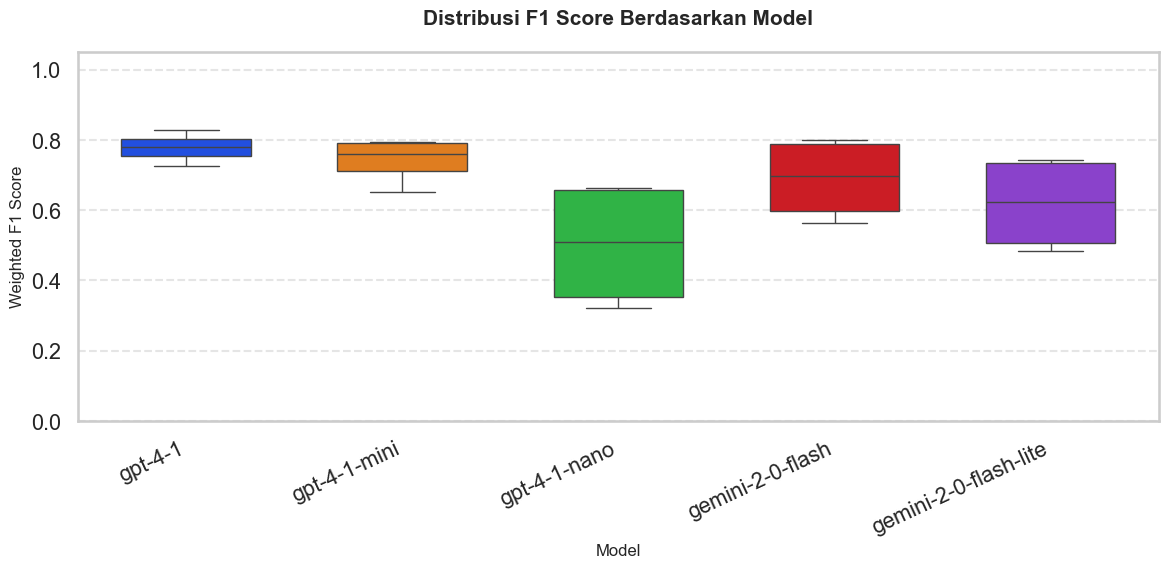

In [13]:
import os
import pandas as pd
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Root folder
root_dir = "result-val"

included_models = [
    "gpt-4-1",
    "gpt-4-1-mini",
    "gpt-4-1-nano",
    "gemini-2-0-flash",
    "gemini-2-0-flash-lite"
]

# Store results here
f1_scores = []

# Walk through all subdirectories
for model_name in included_models:
    model_path = os.path.join(root_dir, model_name)
    if not os.path.isdir(model_path):
        continue
    
    # Go through each CSV file in the model folder
    for file in os.listdir(model_path):
        if file.endswith(".csv"):
            file_path = os.path.join(model_path, file)
            df = pd.read_csv(file_path)
            
            # Merge predicted Type I / II into Type I & II
            df['predicted_label'] = df['predicted_label'].replace({'Type I': 'Type I & II', 'Type II': 'Type I & II'})
            
            try:
                score = f1_score(df['label'], df['predicted_label'], average='weighted', zero_division=0)
                f1_scores.append({
                    "model": model_name,
                    "file": file,
                    "f1_score": score
                })
            except Exception as e:
                print(f"Error in {file_path}: {e}")

# Convert to DataFrame
result_df = pd.DataFrame(f1_scores)

# Set Seaborn style and context
sns.set(style="whitegrid", context="talk", font_scale=0.95)

# Use a brighter color palette
palette = sns.color_palette("bright", n_colors=len(included_models))

# Initialize the figure
plt.figure(figsize=(12, 6))

# Boxplot
sns.boxplot(
    data=result_df,
    x="model",
    y="f1_score",
    palette=palette,
    width=0.6,
    fliersize=0
)

# Improve axes and layout
plt.ylim(0, 1.05)
plt.xticks(rotation=25, ha='right')
plt.ylabel("Weighted F1 Score", fontsize=12)
plt.xlabel("Model", fontsize=12)

# Add title with extra space
plt.title("Distribusi F1 Score Berdasarkan Model", fontsize=15, weight='bold', pad=20)

# Add grid and layout adjustments
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

# Show the plot
plt.show()


Boxplot range F1 Score per metode prompting

/var/folders/mn/htkk69jx1xz2c6lbb7w7_jqh0000gn/T/ipykernel_85839/668661523.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


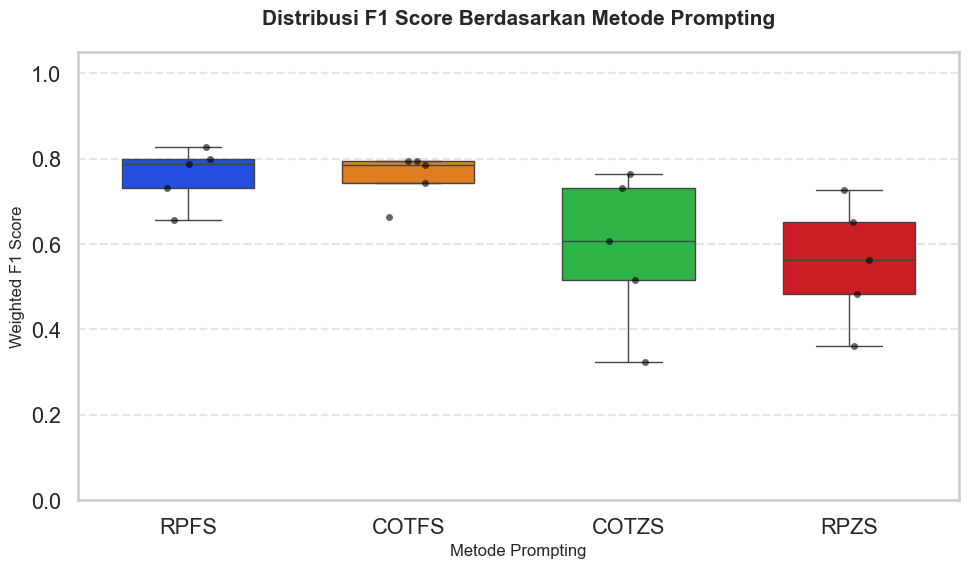

In [14]:
import os
import pandas as pd
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Root folder
root_dir = "result-val"

included_models = [
    "gpt-4-1",
    "gpt-4-1-mini",
    "gpt-4-1-nano",
    "gemini-2-0-flash",
    "gemini-2-0-flash-lite"
]

# Store results here
f1_scores = []

# Walk through all subdirectories
for model_name in included_models:
    model_path = os.path.join(root_dir, model_name)
    if not os.path.isdir(model_path):
        continue
    
    # Go through each CSV file in the model folder
    for file in os.listdir(model_path):
        if file.endswith(".csv"):
            file_path = os.path.join(model_path, file)
            df = pd.read_csv(file_path)
            
            # Merge predicted Type I / II into Type I & II
            df['predicted_label'] = df['predicted_label'].replace({'Type I': 'Type I & II', 'Type II': 'Type I & II'})
            
            try:
                score = f1_score(df['label'], df['predicted_label'], average='weighted', zero_division=0)
                
                # Extract prompt type (e.g., 'cotfs', 'rpzs') from filename
                prompt_type = file.split("-")[-2]

                f1_scores.append({
                    "model": model_name,
                    "file": file,
                    "prompt": prompt_type,
                    "f1_score": score
                })
            except Exception as e:
                print(f"Error in {file_path}: {e}")

# Convert to DataFrame
result_df = pd.DataFrame(f1_scores)

result_df["prompt"] = result_df["prompt"].str.upper()

# Optional: sort prompt types by median
prompt_order = result_df.groupby("prompt")["f1_score"].median().sort_values(ascending=False).index

# Set style
sns.set(style="whitegrid", context="talk", font_scale=0.95)
palette = sns.color_palette("bright", n_colors=len(prompt_order))

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=result_df,
    x="prompt",
    y="f1_score",
    palette=palette,
    order=prompt_order,
    width=0.6,
    fliersize=0
)

# Add individual points
sns.stripplot(
    data=result_df,
    x="prompt",
    y="f1_score",
    color="black",
    size=5,
    jitter=True,
    alpha=0.6,
    order=prompt_order
)

# Labels and formatting
plt.ylim(0, 1.05)
plt.ylabel("Weighted F1 Score", fontsize=12)
plt.xlabel("Metode Prompting", fontsize=12)
plt.title("Distribusi F1 Score Berdasarkan Metode Prompting", fontsize=15, weight='bold', pad=20)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Tradeoff time dan performance (F1 Score)

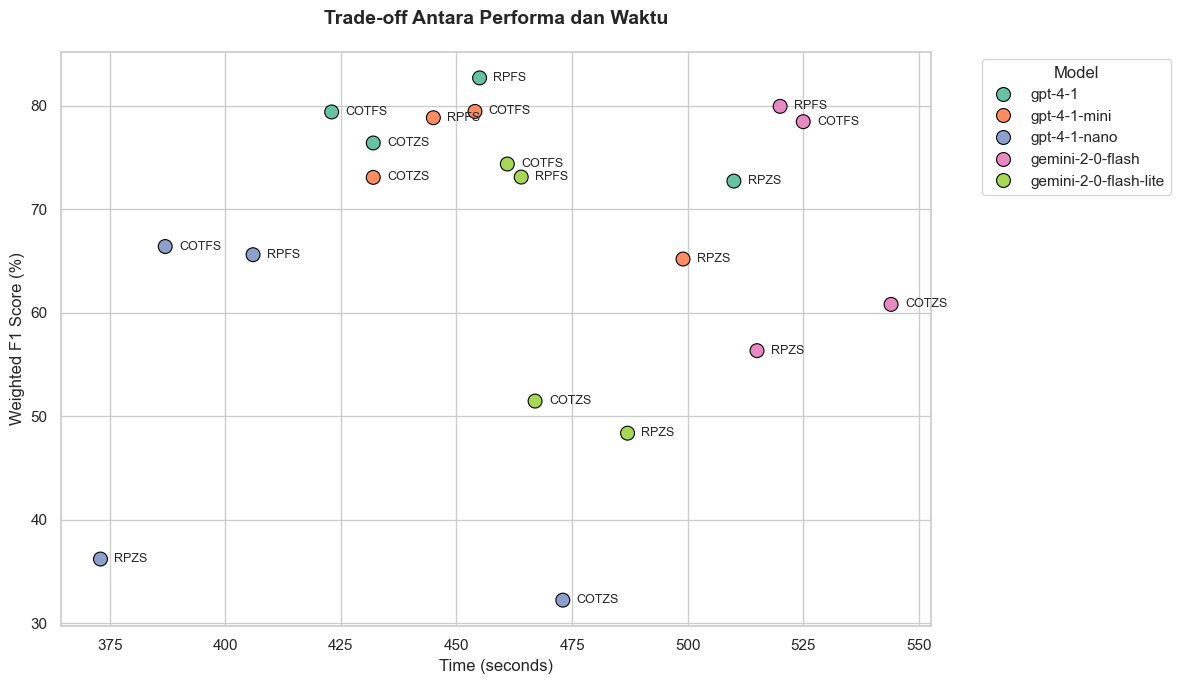

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Keys (model + prompting technique)
keys = [
    "gpt-4-1-rpzs",
    "gpt-4-1-rpfs",
    "gpt-4-1-cotzs",
    "gpt-4-1-cotfs",
    "gpt-4-1-mini-rpzs",
    "gpt-4-1-mini-rpfs",
    "gpt-4-1-mini-cotzs",
    "gpt-4-1-mini-cotfs",
    "gpt-4-1-nano-rpzs",
    "gpt-4-1-nano-rpfs",
    "gpt-4-1-nano-cotzs",
    "gpt-4-1-nano-cotfs",
    "gemini-2-0-flash-rpzs",
    "gemini-2-0-flash-rpfs",
    "gemini-2-0-flash-cotzs",
    "gemini-2-0-flash-cotfs",
    "gemini-2-0-flash-lite-rpzs",
    "gemini-2-0-flash-lite-rpfs",
    "gemini-2-0-flash-lite-cotzs",
    "gemini-2-0-flash-lite-cotfs"
]

# Corresponding times (in seconds)
times = [
    510, 455, 432, 423,
    499, 445, 432, 454,
    373, 406, 473, 387,
    515, 520, 544, 525,
    487, 464, 467, 461
]

# Corresponding F1 scores
f1_scores = [
    72.72, 82.69, 76.40, 79.40,
    65.19, 78.84, 73.08, 79.45,
    36.21, 65.61, 32.24, 66.40,
    56.34, 79.94, 60.81, 78.46,
    48.37, 73.11, 51.47, 74.37
]

# Create DataFrame
plot_df = pd.DataFrame({
    "key": keys,
    "time": times,
    "f1_score": f1_scores
})

# Extract model and prompt for better labeling
plot_df["model"] = plot_df["key"].apply(lambda x: "-".join(x.split("-")[:-1]))
plot_df["prompt"] = plot_df["key"].apply(lambda x: x.split("-")[-1].upper())

# Plot
plt.figure(figsize=(12, 7))
sns.set(style="whitegrid")

scatter = sns.scatterplot(
    data=plot_df,
    x="time",
    y="f1_score",
    hue="model",
    palette="Set2",
    s=100,
    edgecolor="black"
)

# Add labels
for i, row in plot_df.iterrows():
    plt.text(row["time"] + 3, row["f1_score"], row["prompt"], fontsize=9, va='center')

plt.xlabel("Time (seconds)", fontsize=12)
plt.ylabel("Weighted F1 Score (%)", fontsize=12)
plt.title("Trade-off Antara Performa dan Waktu", fontsize=14, weight="bold", pad=20)
plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()